In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Examine Data

In [2]:
train = pd.read_csv("data/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train[["Pclass","Sex","Age","SibSp", "Parch","Embarked"]].describe()

,Pclass,Age,SibSp,Parch
count,891.000000,714.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594
std,0.836071,14.526497,1.102743,0.806057
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000
75%,3.000000,38.000000,1.000000,0.000000
max,3.000000,80.000000,8.000000,6.000000


In [4]:
 #sanity check
assert(len(train["PassengerId"].unique())==891)
assert(len(train["Name"].unique())==891)

In [5]:
print("different tickets: ",len(train["Ticket"].unique()))
print("different fares:   ",len(train["Fare"].unique()))
print("different cabins:  ",len(train["Cabin"].unique())) # appearently, cabin assignement was only known for a few passengers from a document found on a victim after recovery

different tickets:  681
different fares:    248
different cabins:   148


In [6]:
train["Survived"].sum() # 342 survivors  -> 549 victims

342

## preprocess data

In [7]:
# make categorical features
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
train["Embarked"] = le.fit_transform(train["Embarked"])

train["Sex"] = train["Sex"].astype('category').cat.codes

train["Cabin"] = pd.factorize(train["Cabin"])[0]


train["Ticket"] = train["Ticket"].astype('category').cat.codes

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,-1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,-1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,-1,2


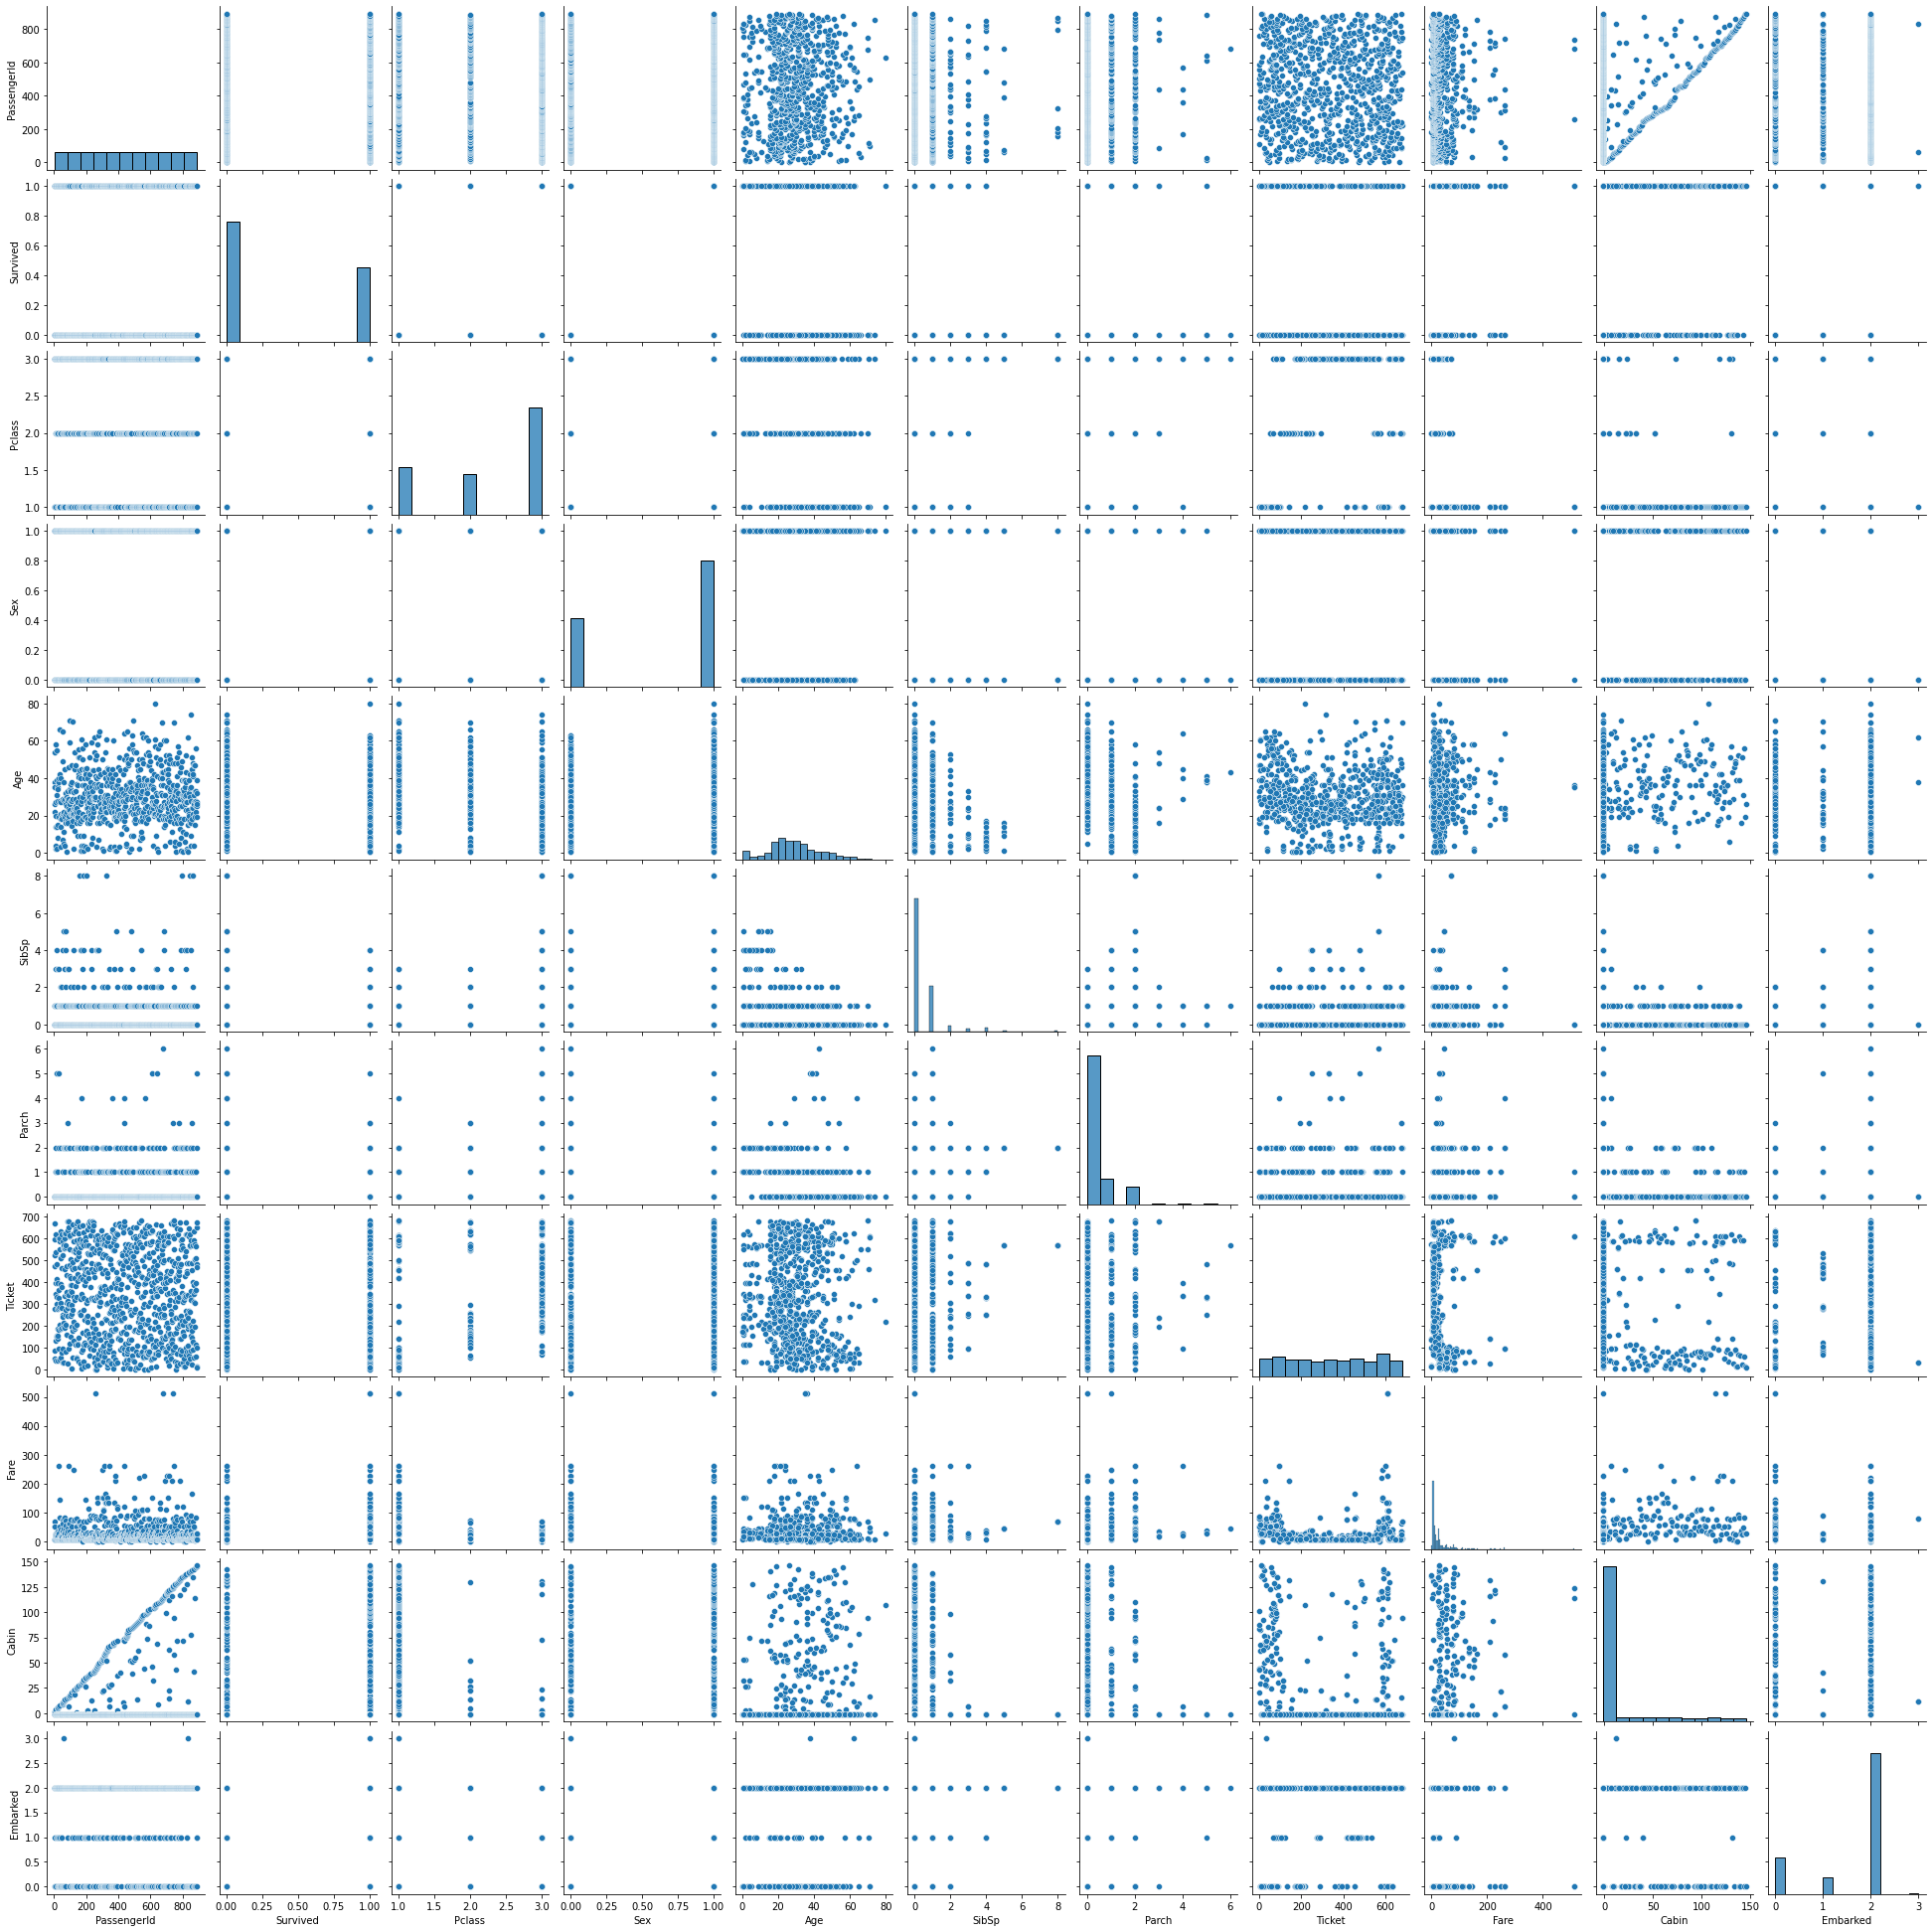

In [9]:
sns.pairplot(train)
plt.show()
# no immidiate dependency between Survived and any other label appearent

# Solve Task

In [16]:
train = train.drop(columns=["Name"])
#validation set
random_state = 42
y_in = train["Survived"]
X_in = train.drop(columns="Survived")
X_train, X_valid, y_train, y_valid= train_test_split(X_in,y_in , test_size=50, random_state=random_state)

In [17]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
448,449,3,0,5.0,2,1,194,19.2583,-1,0
820,821,1,0,52.0,1,1,67,93.5000,138,2
360,361,3,1,40.0,1,4,337,27.9000,-1,2
802,803,1,1,11.0,1,2,33,120.0000,72,2
280,281,3,1,65.0,0,0,290,7.7500,-1,1


In [19]:
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic', enable_categorical=True, tree_method = "approx")
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_valid)

In [26]:
from sklearn.metrics import confusion_matrix,f1_score
print(confusion_matrix(y_valid, preds))
display(f1_score(y_valid, preds, average='macro'))
display(f1_score(y_valid, preds, average='micro'))
display(f1_score(y_valid, preds, average='weighted'))
print(f1_score(y_valid, preds, average=None))

[[28  4]
 [ 6 12]]


0.7771836007130125

0.8000000000000002

0.7971479500891266

[0.84848485 0.70588235]
